In [33]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load
file_path = "Resources/sugar_per_person_g_per_day.csv"
S
# Read Purchasing File and store into Pandas data frame
sugar_intake= pd.read_csv(file_path)

sugar_intake.head()

,country,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,9.12,8.22,8.45,7.24,7.85,8.34,8.9,8.74,8.4,...,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
1,Albania,76.10,97.50,54.40,63.00,61.70,57.00,56.5,63.40,66.6,...,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
2,Algeria,74.30,71.20,70.60,71.90,76.30,52.40,58.9,78.60,77.4,...,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
3,Angola,25.30,20.80,23.50,26.10,31.70,29.10,34.9,26.50,29.4,...,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
4,Antigua and Barbuda,82.20,86.70,89.30,88.10,85.90,89.40,87.5,86.60,86.7,...,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [34]:
#create table with last 3 years
sugar_intake_2011 = sugar_intake[['country','2011']]
sugar_intake_2012 = sugar_intake[['country','2012']]
sugar_intake_2013 = sugar_intake[['country','2013']]
                            

In [49]:
top_2011 = sugar_intake_2011.nlargest(3, ['2011']) 
top_2012 = sugar_intake_2012.nlargest(3, ['2012']) 
top_2013 = sugar_intake_2013.nlargest(3, ['2013']) 

In [54]:
top_combine = pd.merge(top_2011, top_2012, how='outer', on='country')
top_combine = pd.merge(top_combine, top_2013, how='outer', on='country')


top_combine

,2011,2012,2013
country,,,
United States,172.0,174.0,175.0
Malta,165.0,168.0,168.0
Switzerland,160.0,165.0,166.0


Text(0, 0.5, 'Average grams per day')

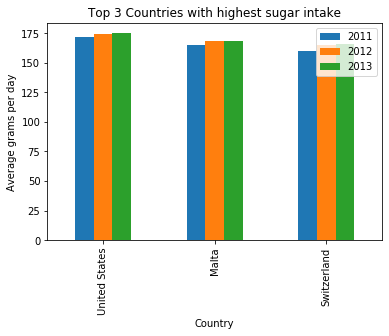

In [52]:
top_combine.plot(kind='bar')

# Give the chart a title, x label, and y label
plt.title("Top 3 Countries with highest sugar intake")
plt.xlabel("Country")
plt.ylabel("Average grams per day")

In [56]:
#10 years of sugar intake 
sugar_overtime = sugar_intake[['country','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']]
sugar_overtime.set_index('country',inplace=True)
sugar_overtime.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,
Afghanistan,15.5,18.6,19.7,20.8,23.4,23.3,24.3,24.8,25.4,24.5
Albania,55.0,58.6,67.2,75.5,102.0,117.0,113.0,122.0,129.0,131.0
Algeria,84.3,75.5,77.9,86.7,78.5,85.3,85.6,74.9,82.8,78.2
Angola,39.3,37.1,38.3,39.5,44.1,40.2,38.9,40.1,42.7,44.7
Antigua and Barbuda,93.1,79.7,85.0,87.3,89.2,87.6,87.6,79.6,87.9,90.1


In [70]:
#find mean for each year globally 
mean_04 = sugar_overtime.mean()['2004']
mean_05 = sugar_overtime.mean()['2005']
mean_06 = sugar_overtime.mean()['2006']
mean_07 = sugar_overtime.mean()['2007']
mean_08 = sugar_overtime.mean()['2008']
mean_09 = sugar_overtime.mean()['2009']
mean_10 = sugar_overtime.mean()['2010']
mean_11 = sugar_overtime.mean()['2011']
mean_12 = sugar_overtime.mean()['2012']
mean_13 = sugar_overtime.mean()['2013']

#create df for line plot
global_mean_sugar_intake = pd.DataFrame({
    '2004':mean_04,
    '2005':mean_05,
    '2006':mean_06,
    '2007':mean_07,
    '2008':mean_08,
    '2009':mean_09,
    '2010':mean_10,
    '2011':mean_11,
    '2012':mean_12,
    '2013':mean_13},index=['Global Average'])

global_mean_sugar_intake

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Global Average,81.0675,80.81506,82.843571,83.695476,84.071964,83.516071,83.254762,83.62381,84.061905,84.483333


In [71]:
#trasnpose data for line graph
transposed = global_mean_sugar_intake.T
transposed

,Global Average
2004,81.067500
2005,80.815060
2006,82.843571
2007,83.695476
2008,84.071964
2009,83.516071
2010,83.254762
2011,83.623810
2012,84.061905
2013,84.483333


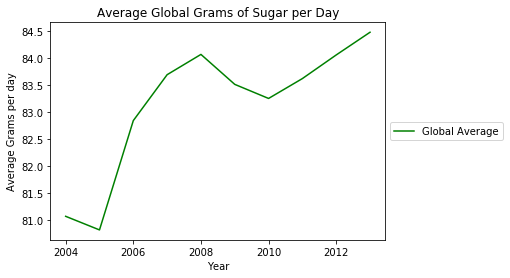

In [102]:
#plot global average
transposed.plot(color='green')
plt.title('Average Global Grams of Sugar per Day')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [109]:
#top 3 countires + canada of sugar intake over time 
sugar_overtime_four = sugar_overtime.iloc[[159,95,145,26]]
sugar_overtime_four

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,
United States,194.0,193.0,187.0,175.0,170.0,165.0,167.0,172.0,174.0,175.0
Malta,150.0,149.0,137.0,137.0,162.0,174.0,171.0,165.0,168.0,168.0
Switzerland,163.0,161.0,164.0,162.0,163.0,159.0,161.0,160.0,165.0,166.0
Canada,149.0,147.0,145.0,146.0,141.0,136.0,126.0,137.0,132.0,132.0


In [97]:
transposed_countries= sugar_overtime_four.T
transposed_countries

country,United States,Malta,Switzerland,Canada
2004,194.0,150.0,163.0,149.0
2005,193.0,149.0,161.0,147.0
2006,187.0,137.0,164.0,145.0
2007,175.0,137.0,162.0,146.0
2008,170.0,162.0,163.0,141.0
2009,165.0,174.0,159.0,136.0
2010,167.0,171.0,161.0,126.0
2011,172.0,165.0,160.0,137.0
2012,174.0,168.0,165.0,132.0
2013,175.0,168.0,166.0,132.0


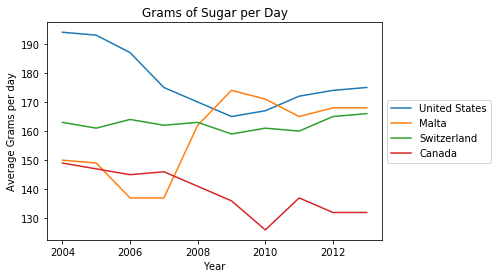

In [101]:
transposed_countries.plot()
plt.title('Grams of Sugar per Day')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [112]:
global_vs_countries = pd.merge(transposed_countries, transposed,left_index=True, right_index=True)
global_vs_countries 

,United States,Malta,Switzerland,Canada,Global Average
2004,194.0,150.0,163.0,149.0,81.067500
2005,193.0,149.0,161.0,147.0,80.815060
2006,187.0,137.0,164.0,145.0,82.843571
2007,175.0,137.0,162.0,146.0,83.695476
2008,170.0,162.0,163.0,141.0,84.071964
2009,165.0,174.0,159.0,136.0,83.516071
2010,167.0,171.0,161.0,126.0,83.254762
2011,172.0,165.0,160.0,137.0,83.623810
2012,174.0,168.0,165.0,132.0,84.061905
2013,175.0,168.0,166.0,132.0,84.483333


In [115]:
global_vs_US_CAD = global_vs_countries[['Global Average','United States','Canada']]
global_vs_US_CAD

,Global Average,United States,Canada
2004,81.067500,194.0,149.0
2005,80.815060,193.0,147.0
2006,82.843571,187.0,145.0
2007,83.695476,175.0,146.0
2008,84.071964,170.0,141.0
2009,83.516071,165.0,136.0
2010,83.254762,167.0,126.0
2011,83.623810,172.0,137.0
2012,84.061905,174.0,132.0
2013,84.483333,175.0,132.0


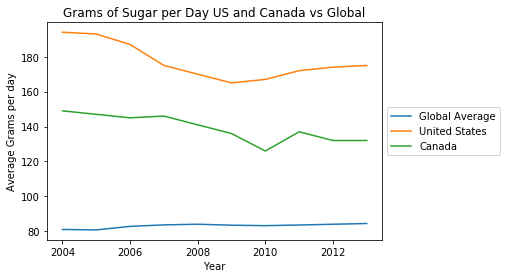

In [116]:
global_vs_US_CAD.plot()
plt.title('Grams of Sugar per Day US and Canada vs Global')
plt.ylabel('Average Grams per day')
plt.xlabel('Year')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))